# Mintun1984Model for Image-Derived Input Functions and Twilite Data

## Setup

In [13]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Boxcar import Boxcar
from RadialArtery import RadialArtery
from Mintun1984Model import Mintun1984Model

In [18]:
# define data & models
petdir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421150523", "pet")
#idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
#twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
kern = os.path.join(petdir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcWmparc-reshape-to-wmparc-select-all.nii.gz")
bc = Boxcar(idif, 
            truths=[10.960150181508300, 0.010125218787388100, 12.033514448247700, 
                    0.20547143513364000, 12.193762084475300, 2.320054521050010, -0.022117255042009900, -1.2474974848592900, 295.6028391571060,
                    0.4360639206409810, 0.07518657405432730, 0.17177757786604200, 
                    2.9510206835641900,
                    0.0009999699304696180],
            nlive=100)
ra = RadialArtery(twil, 
                  kern, 
                  truths=[18.327969152133100, 6.642769319247960, 8.648089814367680, 
                          4.1042092072092800, 3.953159778720750, 3.9202237044806400, -2.3272560792841300, -0.7328577241735120, 26.559201563164700,
                          0.3202142045222380, 0.019345019947492900, 0.04075578904932650, 
                          2.43129792506596, 
                          0.025893919513893400],
                  nlive=100)
rm = Mintun1984Model(twil, 
                     pet,
                     truths=[0.141, 0.210, 0.994, 13, -33, 0.05],
                     nlive=100)

Boxcar: found data for tracer oo
RadialArtery: found data for tracer oo
{'fqfp': '/Users/jjlee/PycharmProjects/dynesty/idif2024/data/ses-20210421150523/pet/sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc',
 'halflife': 122.2416,
 'img': array([0.00000000e+00, 0.00000000e+00, 2.45659995e+03, 4.56225705e+03,
       8.84375970e+02, 1.64241252e+03, 0.00000000e+00, 9.82639983e+01,
       7.52421489e+02, 3.04337638e+03, 3.68630360e+03, 1.98493272e+03,
       4.88512443e+03, 5.31187111e+03, 5.73019499e+03, 2.61382237e+03,
       6.21028467e+03, 3.87440900e+03, 5.13218834e+03, 5.10972799e+03,
       2.61662995e+03, 5.80599859e+03, 3.39431918e+03, 0.00000000e+00,
       4.12708793e+02, 8.64723188e+02, 4.37976677e+02, 2.61662991e+03,
       5.01988660e+03, 3.76210739e+03, 3.64980568e+03, 1.67329551e+03,
       2.95353503e+03, 5.34893071e+04, 2.33868320e+05, 4.28958861e+05,
       5.02538956e+05, 4.82931068e+05, 3.99715485e+05, 3.34108833e+05,
       3.20

## Inspect Boxcar

In [3]:
v = bc.truths
pprint("===================================== v ======================================")
pprint(v)

data = bc.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[10.9601501815083,
 0.0101252187873881,
 12.0335144482477,
 0.20547143513364,
 12.1937620844753,
 2.32005452105001,
 -0.0221172550420099,
 -1.24749748485929,
 295.602839157106,
 0.436063920640981,
 0.0751865740543273,
 0.171777577866042,
 2.95102068356419,
 0.000999969930469618]
'==================================== data ===================================='
{'kernel': None,
 'rho': array([0.00228468, 0.00815354, 0.03768538, 0.09384383, 0.20796501,
       0.32780066, 0.43474552, 0.56689947, 0.69575939, 0.81323808,
       0.93940921, 0.99561631, 0.99437967, 1.        , 0.89700683,
       0.83889975, 0.83909442, 0.79844956, 0.65343793, 0.58147092,
       0.54135097, 0.50396276, 0.4613043 , 0.35709795, 0.35709795,
       0.27492406, 0.20546395, 0.16057136, 0.1481639 , 0.1481639 ,
       0.12852669, 0.11391888]),
 'taus': array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 

In [4]:
pprint("============================== bc.data2t(data) ===============================")
pprint(bc.data2t(data))
pprint("============================= bc.data2taus(data) =============================")
pprint(bc.data2taus(data))
pprint("=========================== bc.data2timesMid(data) ===========================")
pprint(bc.data2timesMid(data))
pprint("================================== bc.fqfp ===================================")
pprint(bc.fqfp)
pprint("========================== bc.input_func_measurement =========================")
pprint(bc.input_func_measurement)
pprint("================================= bc.labels ==================================")
pprint(bc.labels)
pprint("====================== bc.load_nii(bc.fqfp + '.nii.gz') ======================")
pprint(bc.load_nii(bc.fqfp + ".nii.gz"))
pprint("=============================== bc.loglike(v) ================================")
pprint(bc.loglike(v))
pprint("================================== bc.ndim ===================================")
pprint(bc.ndim)
pprint("========================= bc.parse_halflife(bc.fqfp) =========================")
pprint(bc.parse_halflife(bc.fqfp))
pprint("========================= bc.parse_isotope(bc.fqfp) ==========================")
pprint(bc.parse_isotope(bc.fqfp))
pprint("================================== bc.sigma ==================================")
pprint(bc.sigma)
pprint("============================ bc.signalmodel(data) ============================")
pprint(bc.signalmodel(data))

'============================== bc.data2t(data) ==============================='
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.])
'============================= bc.data2taus(data) ============================='
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 20., 20.])
'=========================== bc.data2timesMid(data) ==========================='
array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
   

In [5]:
# pprint("========================== bc.prior_transform('ho') ==========================")
# pprint(bc.prior_transform("ho"))
# pprint("======================== bc.prior_transform_default(v) =======================")
# pprint(bc.prior_transform_default(v))
# pprint("========================== bc.prior_transform_co(v) ==========================")
# pprint(bc.prior_transform_co(v))
# pprint("========================== bc.prior_transform_oo(v) ==========================")
# pprint(bc.prior_transform_oo(v))

## Plot Boxcar

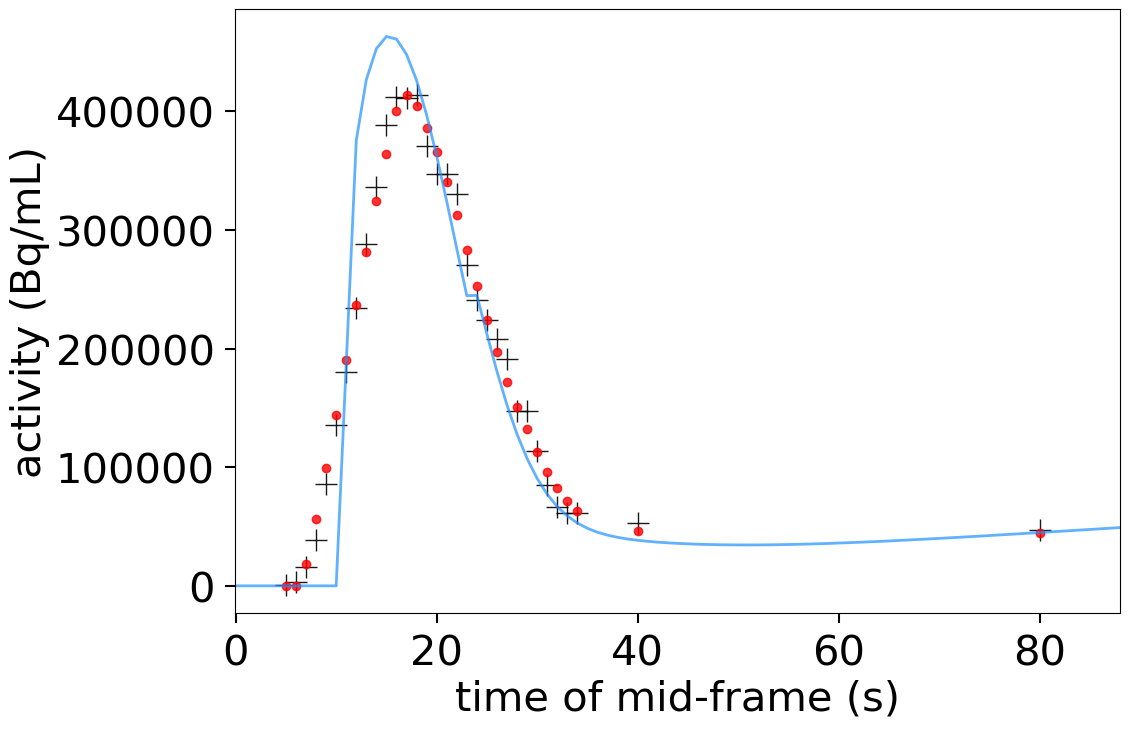

In [6]:
bc.plot_truths(bc.truths)

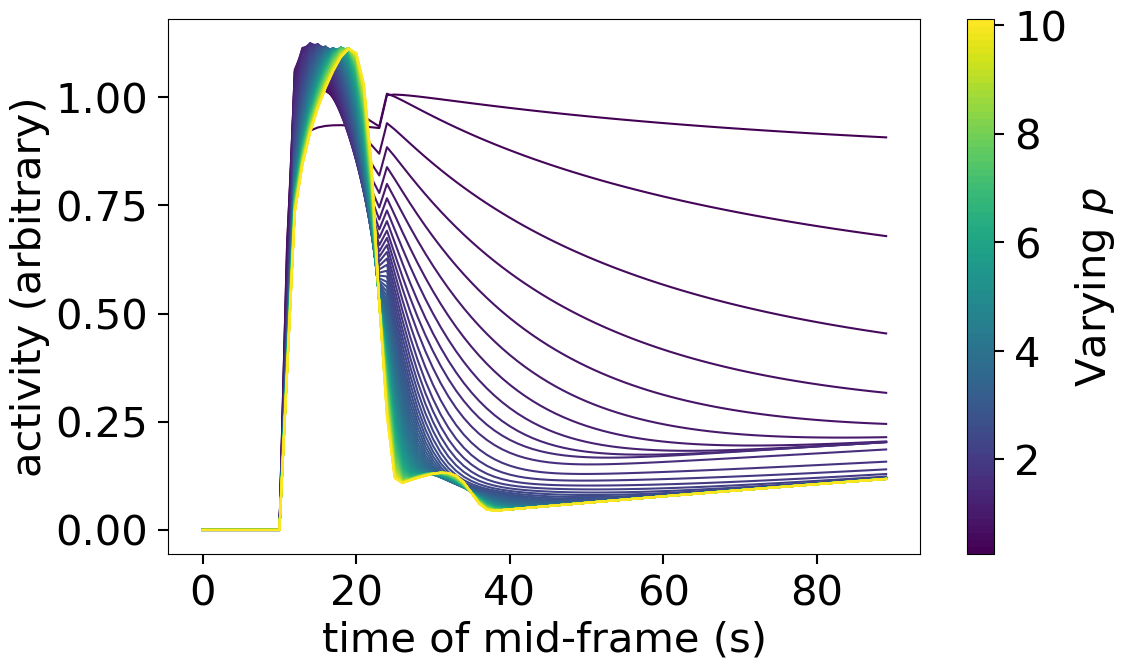

In [7]:
bc.plot_variations(5, 0.25, 10.25 , bc.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 11287 | batch: 7 | bound: 60 | nc: 90 | ncall: 1077861 | eff(%):  1.037 | loglstar: 57.108 < 71.807 < 77.916 | logz: 43.420 +/-  0.302 | stop:  1.381                                           /Users/jjlee/PycharmProjects/dynesty/dynesty-master/py/dynesty/dynamicsampler.py:1637: UserWarning: Warning. The maximum likelihood not reached in the batch. You may not have enough livepoints and/or have highly multi-modal distribution
  warnings.warn('Warning. The maximum likelihood not reached '
iter: 13565 | batch: 10 | bound: 22 | nc: 1 | ncall: 1299178 | eff(%):  1.036 | loglstar: 55.824 < 68.201 < 66.244 | logz: 43.285 +/-  0.233 | stop:  0.983                                           

Parameter 0: 7.593 [2.953, 9.405]
Parameter 1: 3.372 [0.249, 6.803]
Parameter 2: 5.600 [0.576, 36.426]
Parameter 3: 2.811 [0.914, 5.883]
Parameter 4: 7.653 [5.170, 12.189]
Parameter 5: 6.445 [3.974, 8.583]
Parameter 6: -2.595 [-4.316, -0.414]
Parameter 7: -1.749 [-3.947, -0.054]
Parameter 8: 218.035 [33.525, 292.524]
Parameter 9: 0.509 [0.279, 0.652]
Parameter 10: 0.194 [0.027, 0.239]
Parameter 11: 0.121 [0.054, 0.230]
Parameter 12: 3.564 [1.705, 4.430]
Parameter 13: 0.035 [0.021, 0.045]
Parameter 0: 7.593 [2.953, 9.405]
Parameter 1: 3.372 [0.249, 6.803]
Parameter 2: 5.600 [0.576, 36.426]
Parameter 3: 2.811 [0.914, 5.883]
Parameter 4: 7.653 [5.170, 12.189]
Parameter 5: 6.445 [3.974, 8.583]
Parameter 6: -2.595 [-4.316, -0.414]
Parameter 7: -1.749 [-3.947, -0.054]
Parameter 8: 218.035 [33.525, 292.524]
Parameter 9: 0.509 [0.279, 0.652]
Parameter 10: 0.194 [0.027, 0.239]
Parameter 11: 0.121 [0.054, 0.230]
Parameter 12: 3.564 [1.705, 4.430]
Parameter 13: 0.035 [0.021, 0.045]


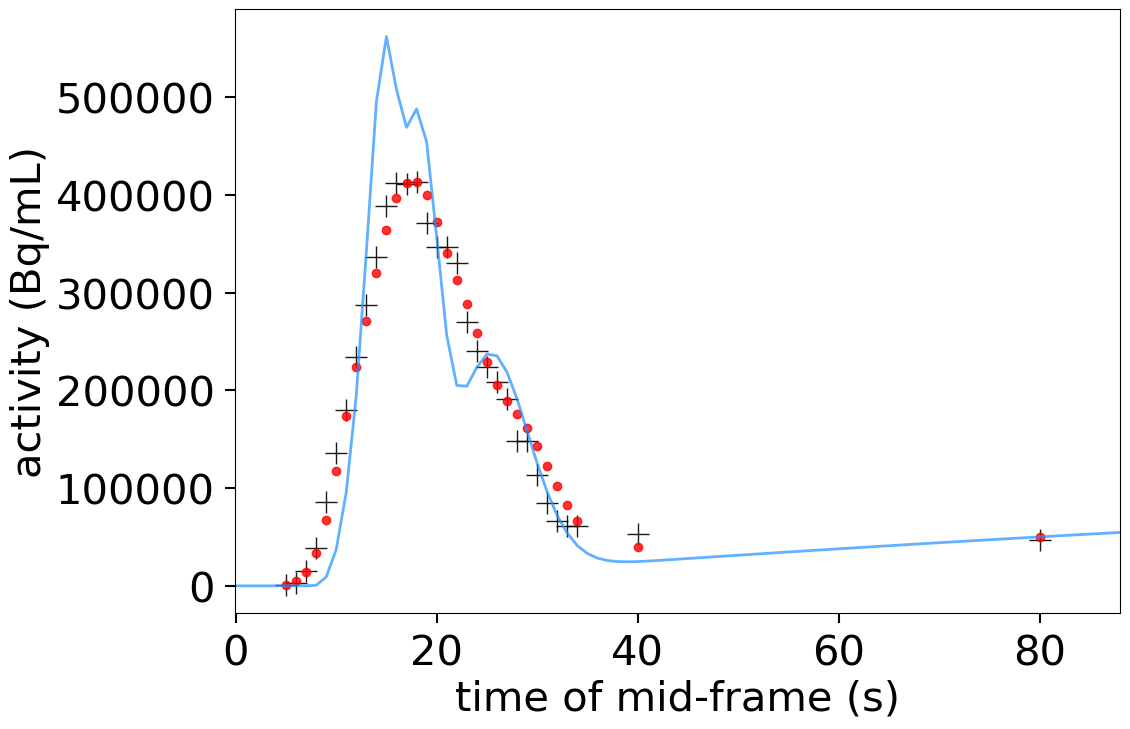

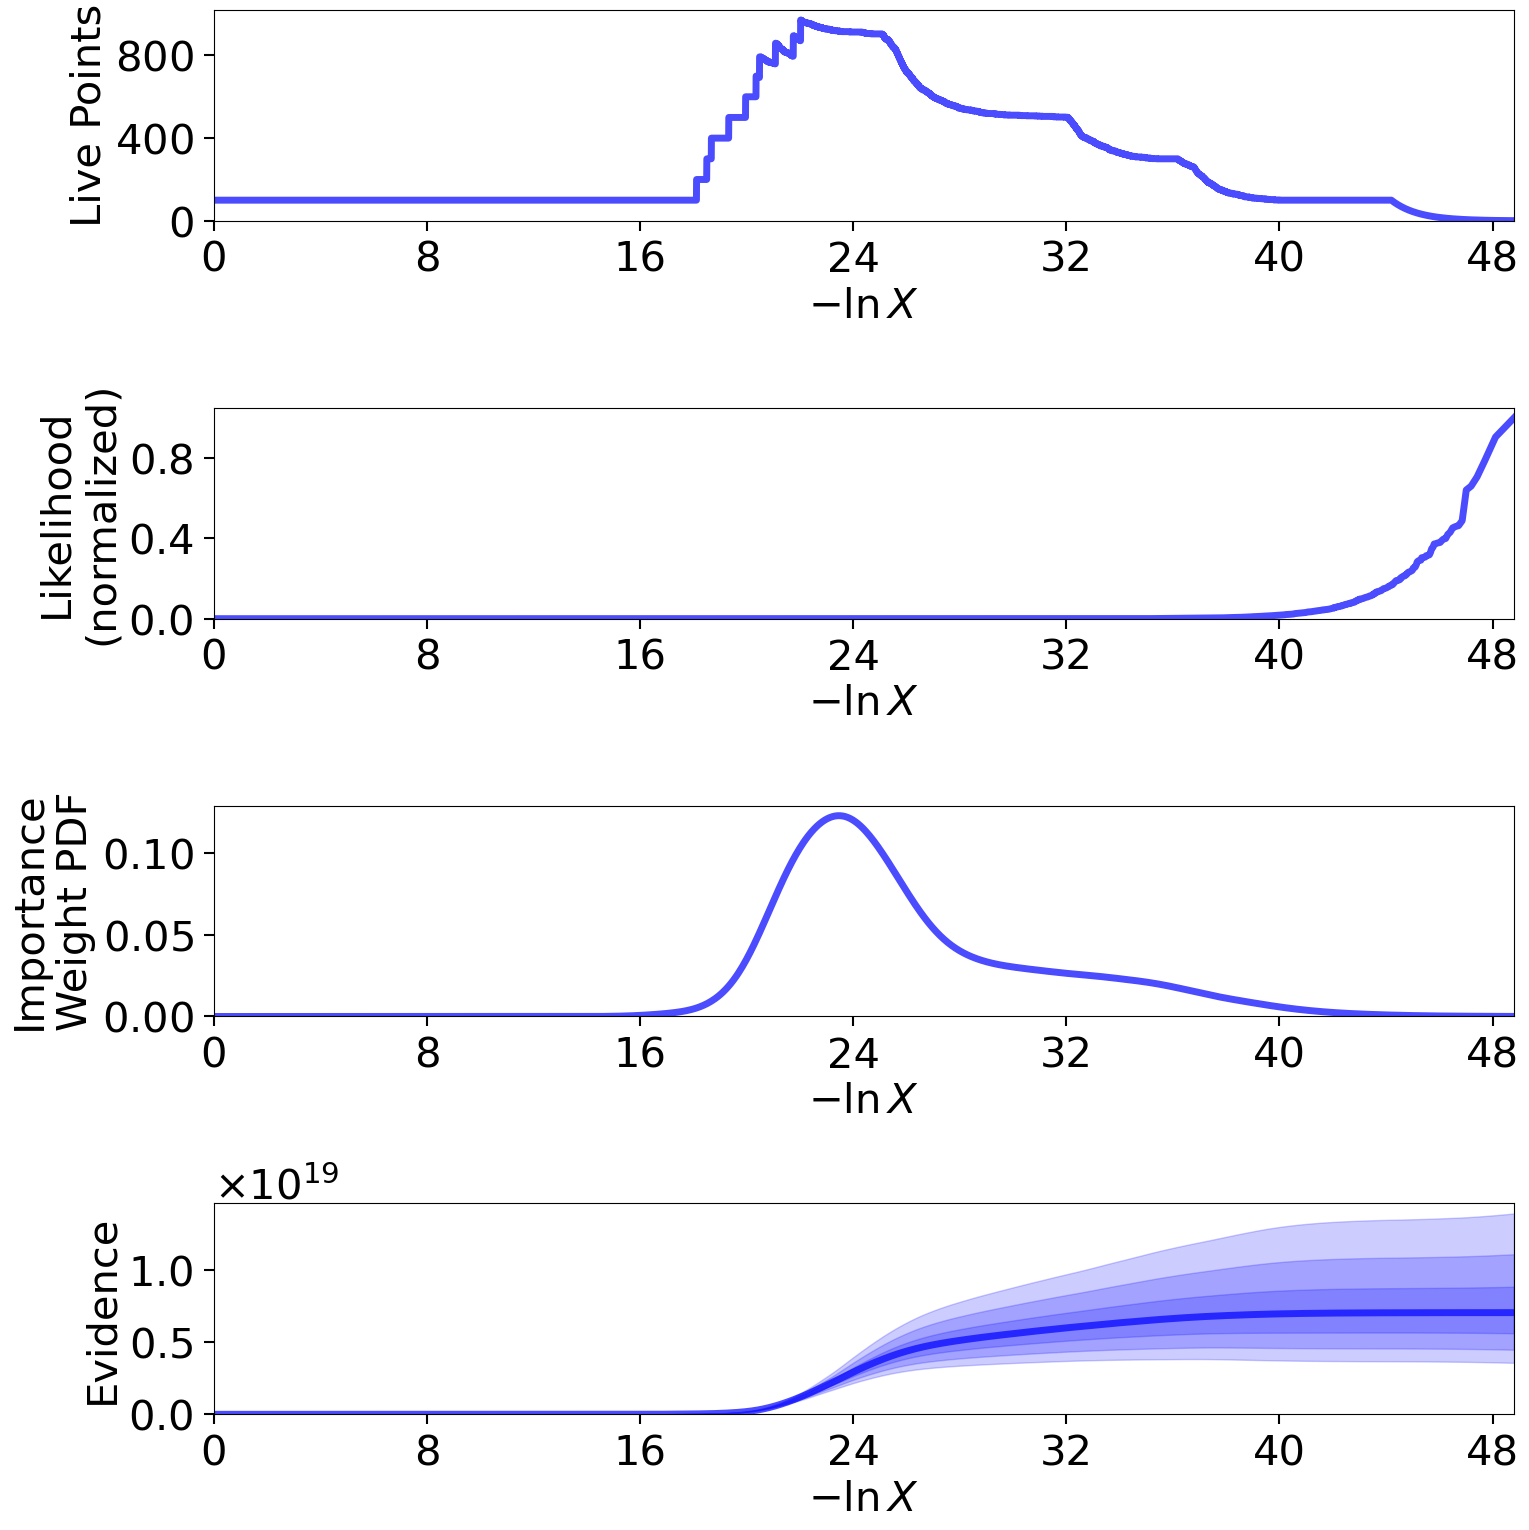

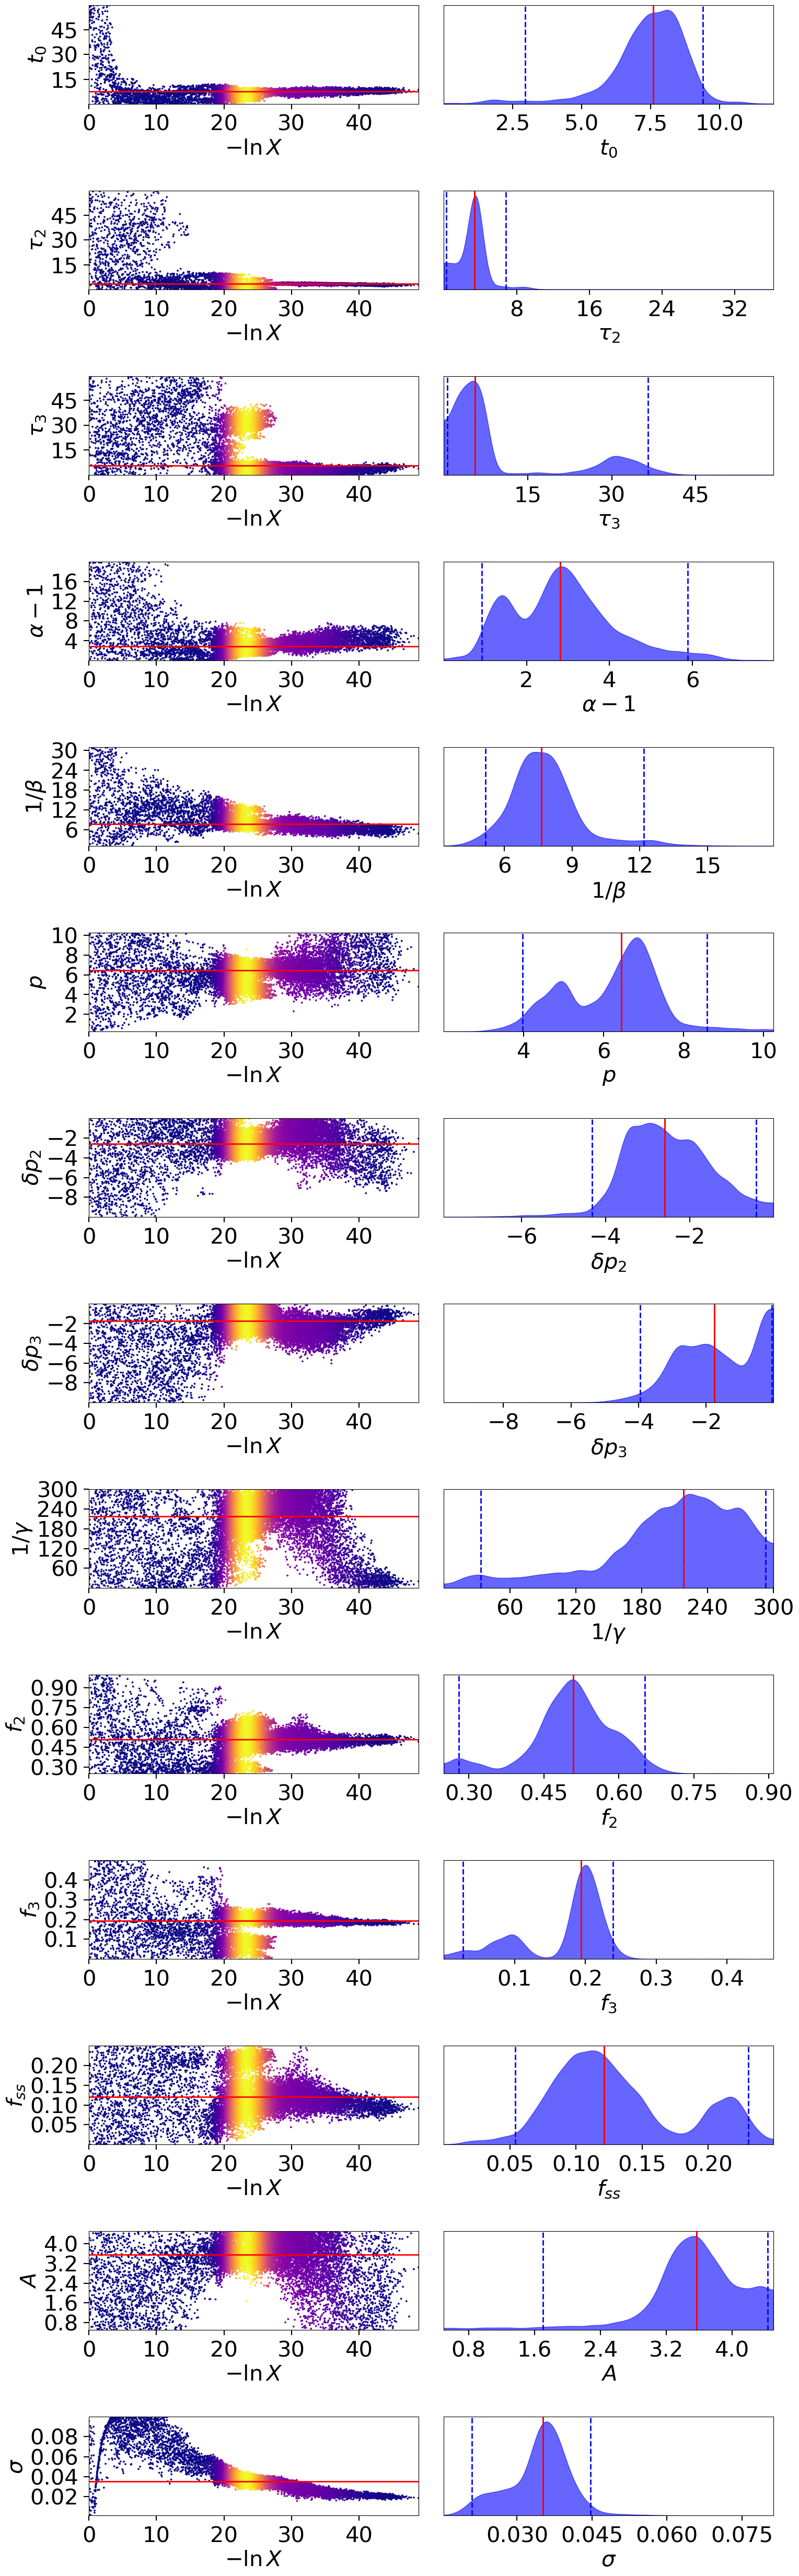

In [8]:
# de novo
res = bc.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(bc.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

## Inspect RadialArtery

In [3]:
v = ra.truths
pprint("===================================== v ======================================")
pprint(v)

data = ra.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[18.3279691521331,
 6.64276931924796,
 8.64808981436768,
 4.10420920720928,
 3.95315977872075,
 3.92022370448064,
 -2.32725607928413,
 -0.732857724173512,
 26.5592015631647,
 0.320214204522238,
 0.0193450199474929,
 0.0407557890493265,
 2.43129792506596,
 0.0258939195138934]
'==================================== data ===================================='
{'halflife': 122.2416,
 'kernel': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00474594, 0.10643181, 0.08525183, 0.07242634, 0.06271453,
       0.05503421, 0.04877346, 0.04355563, 0.03913338, 0.03533594,
       0.03204061, 0.02915633, 0.0266137 , 0.02435865, 0.02234826,
       0.02054791, 0.01892928, 0.01746894, 0.01614732, 0.0149479 ,
       0.01385661, 0.01286143, 0.01195198, 0.01111926, 0.01035544,
       0.00965365, 0.00900786, 0.00841273, 0.00786356, 0.00

In [4]:
pprint("============================== ra.data2t(data) ===============================")
pprint(ra.data2t(data))
pprint("============================= ra.data2taus(data) =============================")
pprint(ra.data2taus(data))
pprint("=========================== ra.data2timesMid(data) ===========================")
pprint(ra.data2timesMid(data))
pprint("================================== ra.fqfp ===================================")
pprint(ra.fqfp)
pprint("========================== ra.input_func_measurement =========================")
pprint(ra.input_func_measurement)
pprint("============================ ra.kernel_measurement ===========================")
pprint(ra.kernel_measurement)
pprint("================================= ra.labels ==================================")
pprint(ra.labels)
pprint("=============================== ra.loglike(v) ================================")
pprint(ra.loglike(v))
pprint("====================== ra.load_nii(ra.fqfp + '.nii.gz') ======================")
pprint(ra.load_nii(ra.fqfp + ".nii.gz"))
pprint("================================== ra.ndim ===================================")
pprint(ra.ndim)
pprint("========================= ra.parse_halflife(ra.fqfp) =========================")
pprint(ra.parse_halflife(ra.fqfp))
pprint("========================= ra.parse_isotope(ra.fqfp) ==========================")
pprint(ra.parse_isotope(ra.fqfp))
pprint("================================== ra.sigma ==================================")
pprint(ra.sigma)
pprint("============================ ra.signalmodel(data) ============================")
pprint(ra.signalmodel(data))

'============================== ra.data2t(data) ==============================='
array([  1.15,   2.15,   3.15,   4.15,   5.15,   6.15,   7.15,   8.15,
         9.15,  10.15,  11.15,  12.15,  13.15,  14.15,  15.15,  16.15,
        17.15,  18.15,  19.15,  20.15,  21.15,  22.15,  23.15,  24.15,
        25.15,  26.15,  27.15,  28.15,  29.15,  30.15,  31.15,  32.15,
        33.15,  34.15,  35.15,  36.15,  37.15,  38.15,  39.15,  40.15,
        41.15,  42.15,  43.15,  44.15,  45.15,  46.15,  47.15,  48.15,
        49.15,  50.15,  51.15,  52.15,  53.15,  54.15,  55.15,  56.15,
        57.15,  58.15,  59.15,  60.15,  61.15,  62.15,  63.15,  64.15,
        65.15,  66.15,  67.15,  68.15,  69.15,  70.15,  71.15,  72.15,
        73.15,  74.15,  75.15,  76.15,  77.15,  78.15,  79.15,  80.15,
        81.15,  82.15,  83.15,  84.15,  85.15,  86.15,  87.15,  88.15,
        89.15,  90.15,  91.15,  92.15,  93.15,  94.15,  95.15,  96.15,
        97.15,  98.15,  99.15, 100.15, 101.15, 102.15, 103.15, 104.

In [ ]:
# pprint("========================== ra.prior_transform('ho') ==========================")
# pprint(ra.prior_transform("ho"))
# pprint("========================== ra.prior_transform_co(v) ==========================")
# pprint(ra.prior_transform_co(v))
# pprint("========================== ra.prior_transform_oo(v) ==========================")
# pprint(ra.prior_transform_oo(v))
# pprint("======================== ra.prior_transform_default(v) =======================")
# pprint(ra.prior_transform_default(v))

## Plot RadialArtery

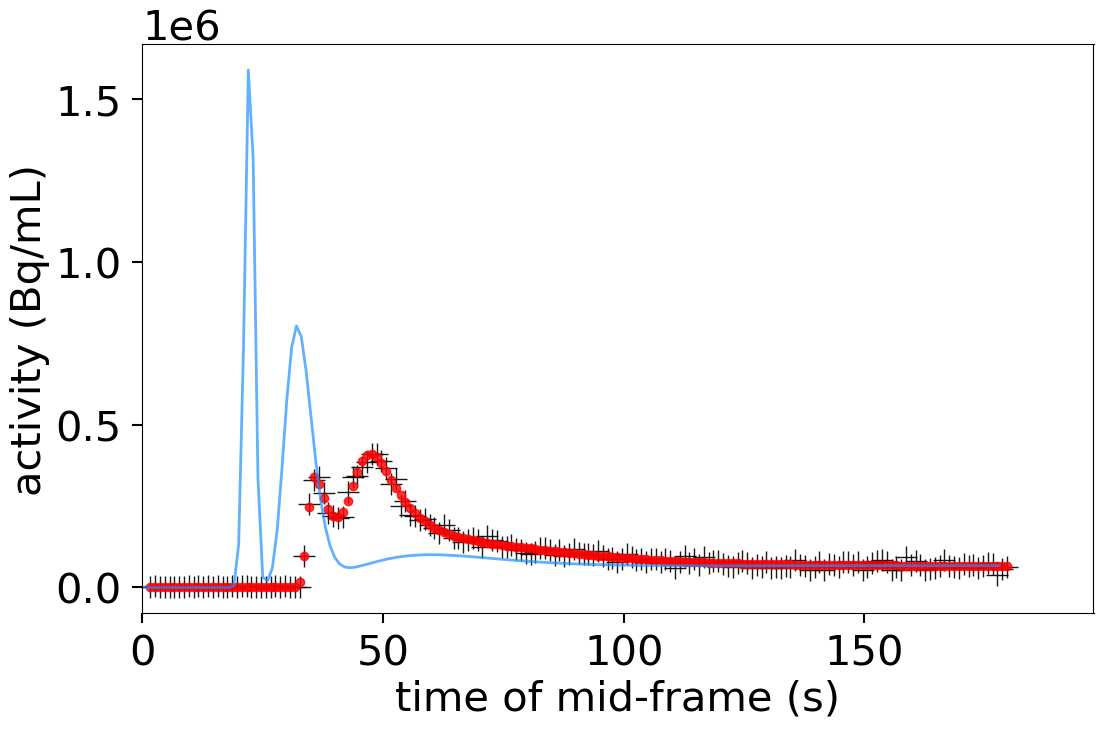

In [5]:
ra.plot_truths(ra.truths)

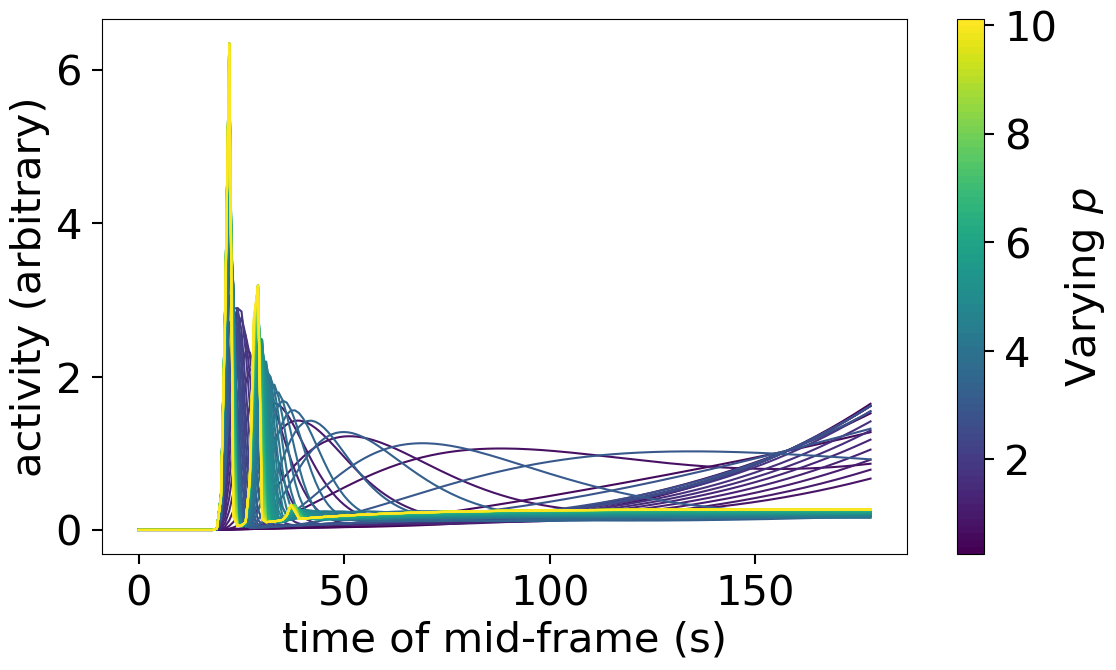

In [6]:
ra.plot_variations(5, 0.25, 10.25, ra.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [7]:
# de novo
res2 = ra.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(ra.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

iter: 1294 | batch: 0 | bound: 27 | nc: 127 | ncall: 93208 | eff(%):  1.387 | loglstar:   -inf < 201.863 <    inf | logz: 186.887 +/-  0.374 | dlogz: 39.515 >  0.010                                 Traceback (most recent call last):
  File "/Users/jjlee/PycharmProjects/dynesty/dynesty-master/py/dynesty/dynesty.py", line 913, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/Artery.py", line 131, in loglike
    data = self.data(v)
KeyboardInterrupt


Exception while calling loglikelihood function:
  params: [ 5.76555290e+00  8.93696799e+00  3.46716432e+01  3.45398222e+00
  2.07215744e+01  8.96788494e+00 -1.68073662e+00 -6.08484009e+00
  4.24335937e+01  5.80393795e-01  3.29480237e-02  1.61386985e-01
  7.63180389e-01  7.18849609e-02]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

## Inspect Mintun1984Model

In [19]:
v = rm.truths
pprint("===================================== v ======================================")
pprint(v)

data = rm.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.141, 0.21, 0.994, 13, -33, 0.05]
'==================================== data ===================================='
{'halflife': 122.2416,
 'inputFuncInterp': array([0.00000000e+00, 0.00000000e+00, 9.90344919e-02, 1.83921199e-01,
       3.56524166e-02, 6.62116309e-02, 0.00000000e+00, 3.96137969e-03,
       3.03328509e-02, 1.22689587e-01, 1.48608325e-01, 8.00198677e-02,
       1.96937159e-01, 2.14140873e-01, 2.31005032e-01, 1.05372700e-01,
       2.50359195e-01, 1.56191539e-01, 2.06897206e-01, 2.05991747e-01,
       1.05485884e-01, 2.34060951e-01, 1.36837370e-01, 0.00000000e+00,
       1.66377947e-02, 3.48601414e-02, 1.76564352e-02, 1.05485883e-01,
       2.02369913e-01, 1.51664252e-01, 1.47136961e-01, 6.74566369e-02,
       1.19067755e-01, 2.15634880e+00, 9.42808384e+00, 1.72928941e+01,
       2.02591758e+01, 1.94687104e+01, 1.61139871e+01, 1.34691440e+01,
       1.29331128e+01, 1.26279731e+01, 1.42550811

In [20]:
pprint("============================== rm.data2t(data) ===============================")
pprint(rm.data2t(data))
pprint("============================= rm.data2taus(data) =============================")
pprint(rm.data2taus(data))
pprint("=========================== rm.data2timesMid(data) ===========================")
pprint(rm.data2timesMid(data))
pprint("================================== rm.fqfp ===================================")
pprint(rm.fqfp)
pprint("========================== rm.input_function() =========================")
pprint(rm.input_function())
pprint("================================= rm.labels ==================================")
pprint(rm.labels)
pprint("====================== rm.load_nii(rm.fqfp + '.nii.gz') ======================")
pprint(rm.load_nii(rm.fqfp + ".nii.gz"))
pprint("=============================== rm.loglike(v) ================================")
pprint(rm.loglike(v))
pprint("================================== rm.ndim ===================================")
pprint(rm.ndim)
pprint("========================= rm.parse_halflife(rm.fqfp) =========================")
pprint(rm.parse_halflife(rm.fqfp))
pprint("========================= rm.parse_isotope(rm.fqfp) ==========================")
pprint(rm.parse_isotope(rm.fqfp))
pprint("================================== rm.sigma ==================================")
pprint(rm.sigma)
pprint("============================ rm.signalmodel(data) ============================")
pprint(rm.signalmodel(data))

'============================== rm.data2t(data) ==============================='
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.])
'============================= rm.data2taus(data) ============================='
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 20., 20.])
'=========================== rm.data2timesMid(data) ==========================='
array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
   

## Plot Model1984Model

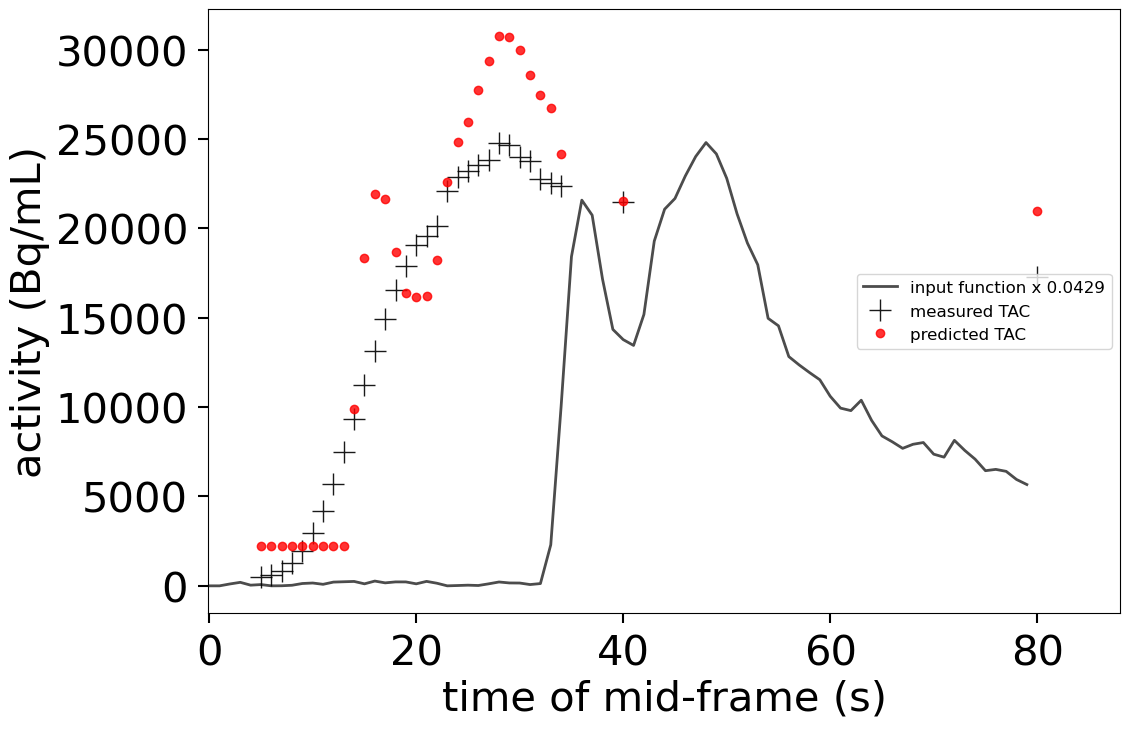

In [21]:
rm.plot_truths()

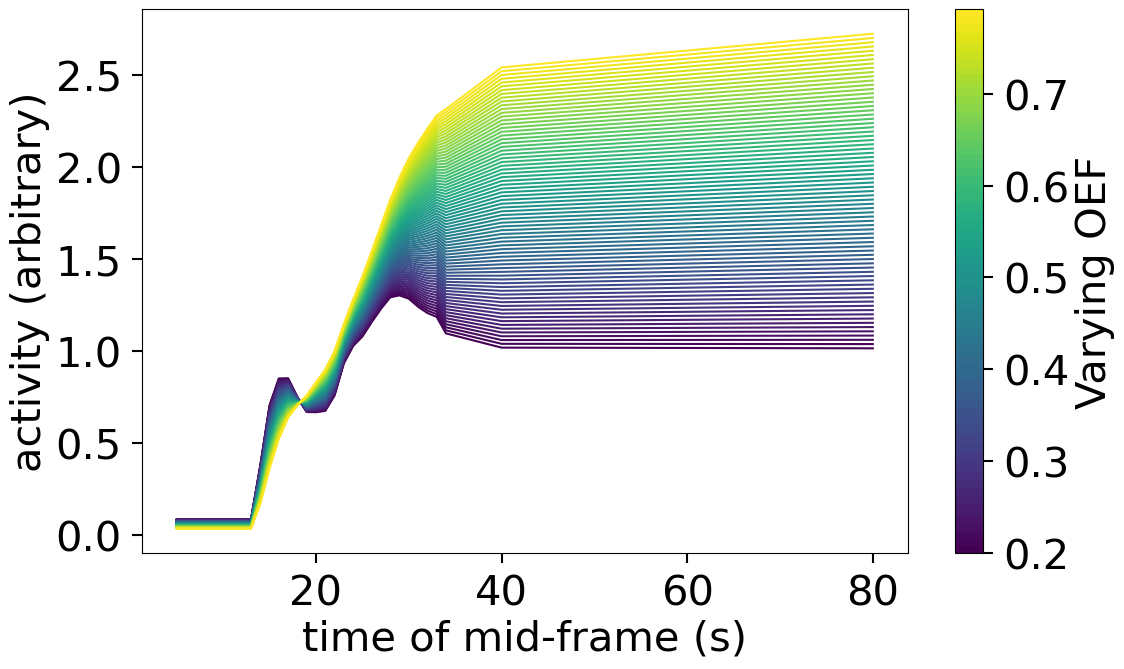

In [22]:
rm.plot_variations(0, 0.2, 0.8 , rm.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [23]:
# de novo
res3 = rm.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(rm.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

iter: 12114 | batch: 15 | bound: 8 | nc: 49 | ncall: 591285 | eff(%):  2.031 | loglstar: -86.618 < -80.017 < -76.591 | logz: -102.881 +/-  0.205 | stop:  1.168                                       

KeyboardInterrupt: 

# Misc. Testing

In [ ]:
from pympler import asizeof
asizeof.asizeof(res)

In [ ]:
res.asdict()

In [ ]:
rd = res.asdict()
rd

In [ ]:
rd["logz"][-1]

In [ ]:
rd["information"][-1]

In [ ]:
res.summary()

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

fqfn = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-wmparc.nii.gz")
nii = nib.load(fqfn)
img = nii.get_fdata()
plt.imshow(img, cmap="gray", origin="lower")
plt.figure(figsize=(12, 8))
plt.plot(img[0,], linewidth=2)